In [14]:
from dataclasses import dataclass
import networkx as nx
import matplotlib.pyplot as plt
from math import lcm
from player_helper_code import generateMemoryMap, build_graph_from_memory, MazeGraph, Square

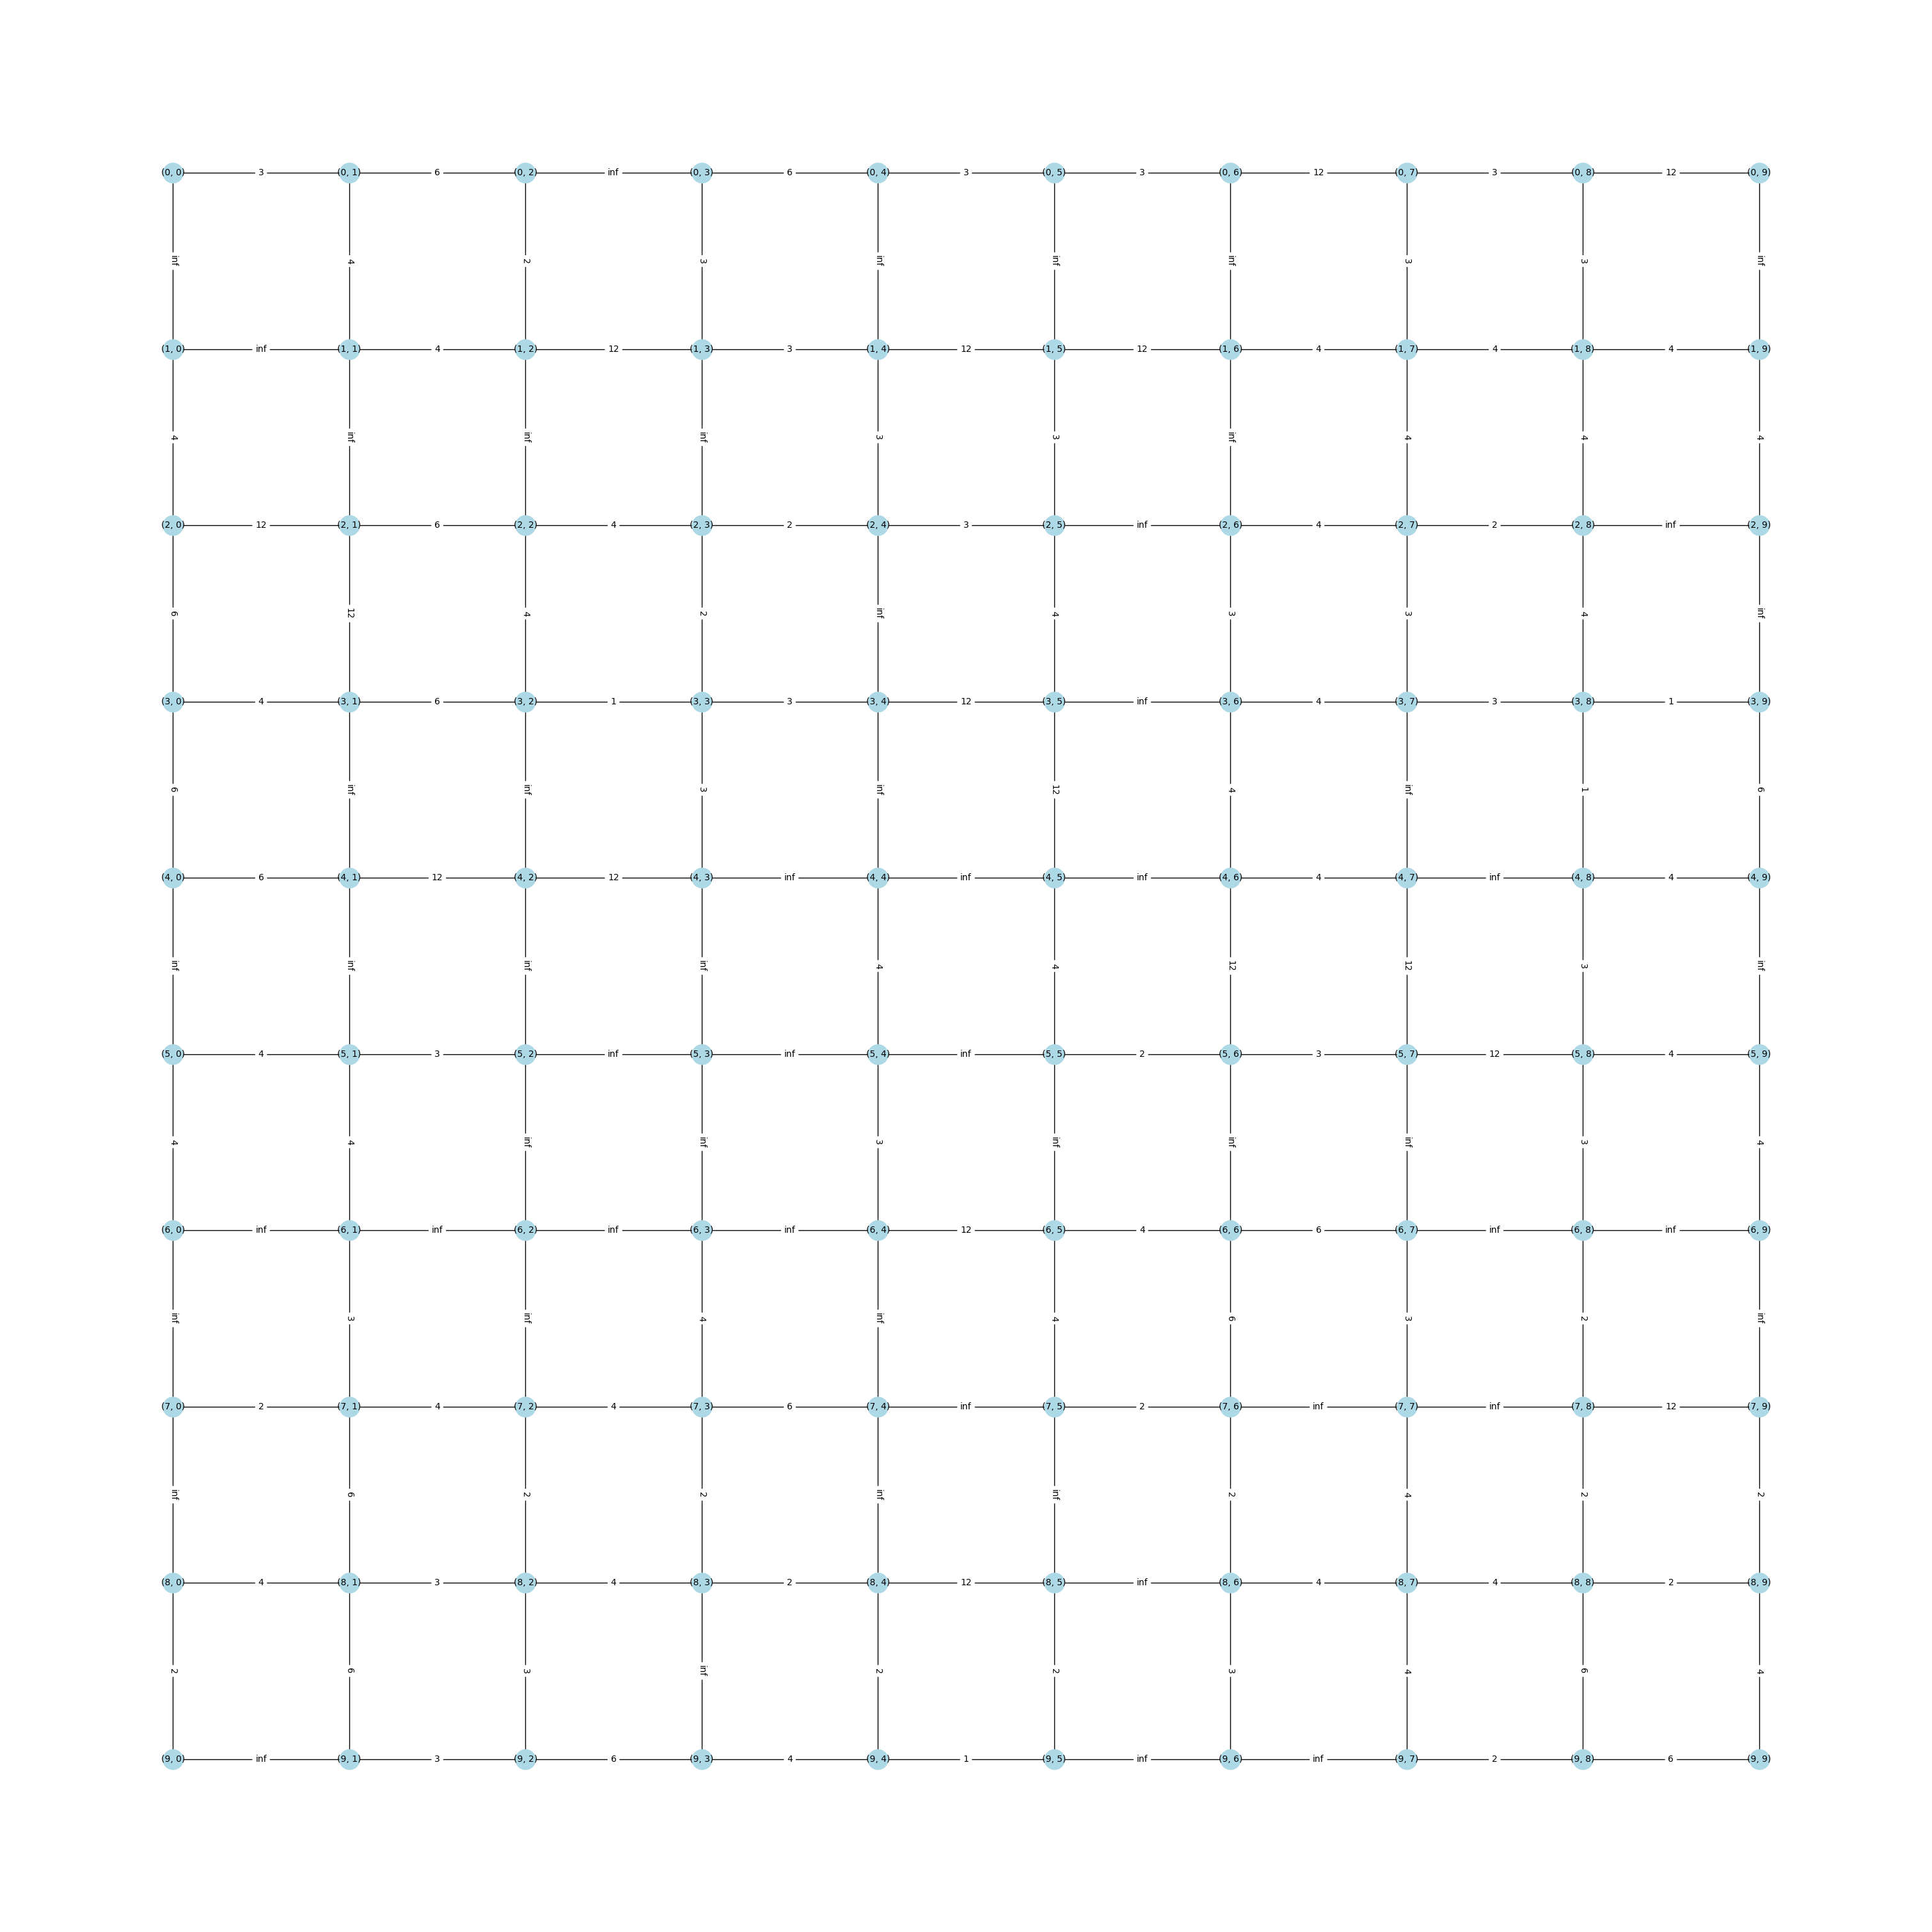

In [15]:
mem_map = generateMemoryMap(dim=10)
graph = build_graph_from_memory(mem_map)
graph.visualize_graph_in_grid()

In [16]:
import heapq

def findShortestPathsToEachNode(graph: MazeGraph, startNode: tuple, turnNumber: int):
    dimension = graph.getMazeDimension()

    # Initialize the minDistanceArray with infinity
    minDistanceArray = [[float('inf')] * dimension for _ in range(dimension)]
    minDistanceArray[startNode[0]][startNode[1]] = 0  # Start node has distance 0

    # Initialize the parent dictionary to track the shortest path and the turn when we moved to this node
    # parent[(x, y)] = (parentNode, turnWeMovedToNode)
    parent = {startNode: (None, turnNumber)}  # Initially at startNode at the given turnNumber

    # Min-heap stores (distance, (x, y) node)
    minHeap = [(0, startNode)]  # Start node with distance 0

    visitedNodes = set()

    # Process the heap until it is empty
    while minHeap:
        turnsToCurrentNode, currentNode = heapq.heappop(minHeap)
        currentXCoord, currentYCoord = currentNode

        # Skip node if already visited
        if currentNode in visitedNodes:
            continue

        visitedNodes.add(currentNode)

        # Get neighbors of the current node from the graph
        neighbors: dict[tuple, int] = graph.getNeighbors(currentNode)

        for (xCoordNeighbour, yCoordNeighbour), (node1Freq, node2Freq) in neighbors.items():
            # Combined Frequency of the doors
            if node1Freq == 0 or node2Freq == 0:
                combinedFrequencey = float('inf')
            else:
                # LCM is the combined frequency of the doors
                combinedFrequencey = lcm(node1Freq, node2Freq)

            # Determine the turn number when we reach this node
            turnWeWillBeAtThisNode = turnNumber + turnsToCurrentNode

            # Calculate the number of turns we need to wait for the door to open
            turnsToWait = (combinedFrequencey - (turnWeWillBeAtThisNode % combinedFrequencey)) % combinedFrequencey

            newTurnsToGetToNeighbor = turnsToCurrentNode + turnsToWait + 1

            # Update the neighbor's distance if a shorter path is found
            if newTurnsToGetToNeighbor < minDistanceArray[xCoordNeighbour][yCoordNeighbour]:
                minDistanceArray[xCoordNeighbour][yCoordNeighbour] = newTurnsToGetToNeighbor
                # Store both the parent node and the turn at which we moved to this neighbor
                parent[(xCoordNeighbour, yCoordNeighbour)] = (currentNode, turnWeWillBeAtThisNode + turnsToWait + 1)
                heapq.heappush(minHeap, (newTurnsToGetToNeighbor, (xCoordNeighbour, yCoordNeighbour)))

    return minDistanceArray, parent  # Return both distances and paths


In [33]:
mem_map = generateMemoryMap(dim=10)
graph = build_graph_from_memory(mem_map)
minDistanceArray, parent = findShortestPathsToEachNode(graph, (0, 0), turnNumber=1)
minDistanceArray

[[0, 32, 30, 28, 27, 30, 36, 42, 48, 52],
 [3, 34, 32, 20, 24, inf, 38, 40, 44, 48],
 [6, 12, 16, 18, 20, 24, 36, 42, 46, 56],
 [8, 10, 12, 20, 29, 28, 30, 33, 48, 54],
 [9, 17, 16, 20, 28, 29, 30, 32, 40, 44],
 [12, 24, 18, 20, 27, 28, 32, 36, 39, 40],
 [14, 26, 24, 24, 25, 29, 36, 38, 48, 51],
 [18, 24, 26, 36, 26, 28, 50, 48, 51, 52],
 [20, 28, 30, 39, 28, 30, 32, 42, 48, 60],
 [inf, 30, 32, 40, 36, 32, 36, 40, 44, 48]]

(9, 9)


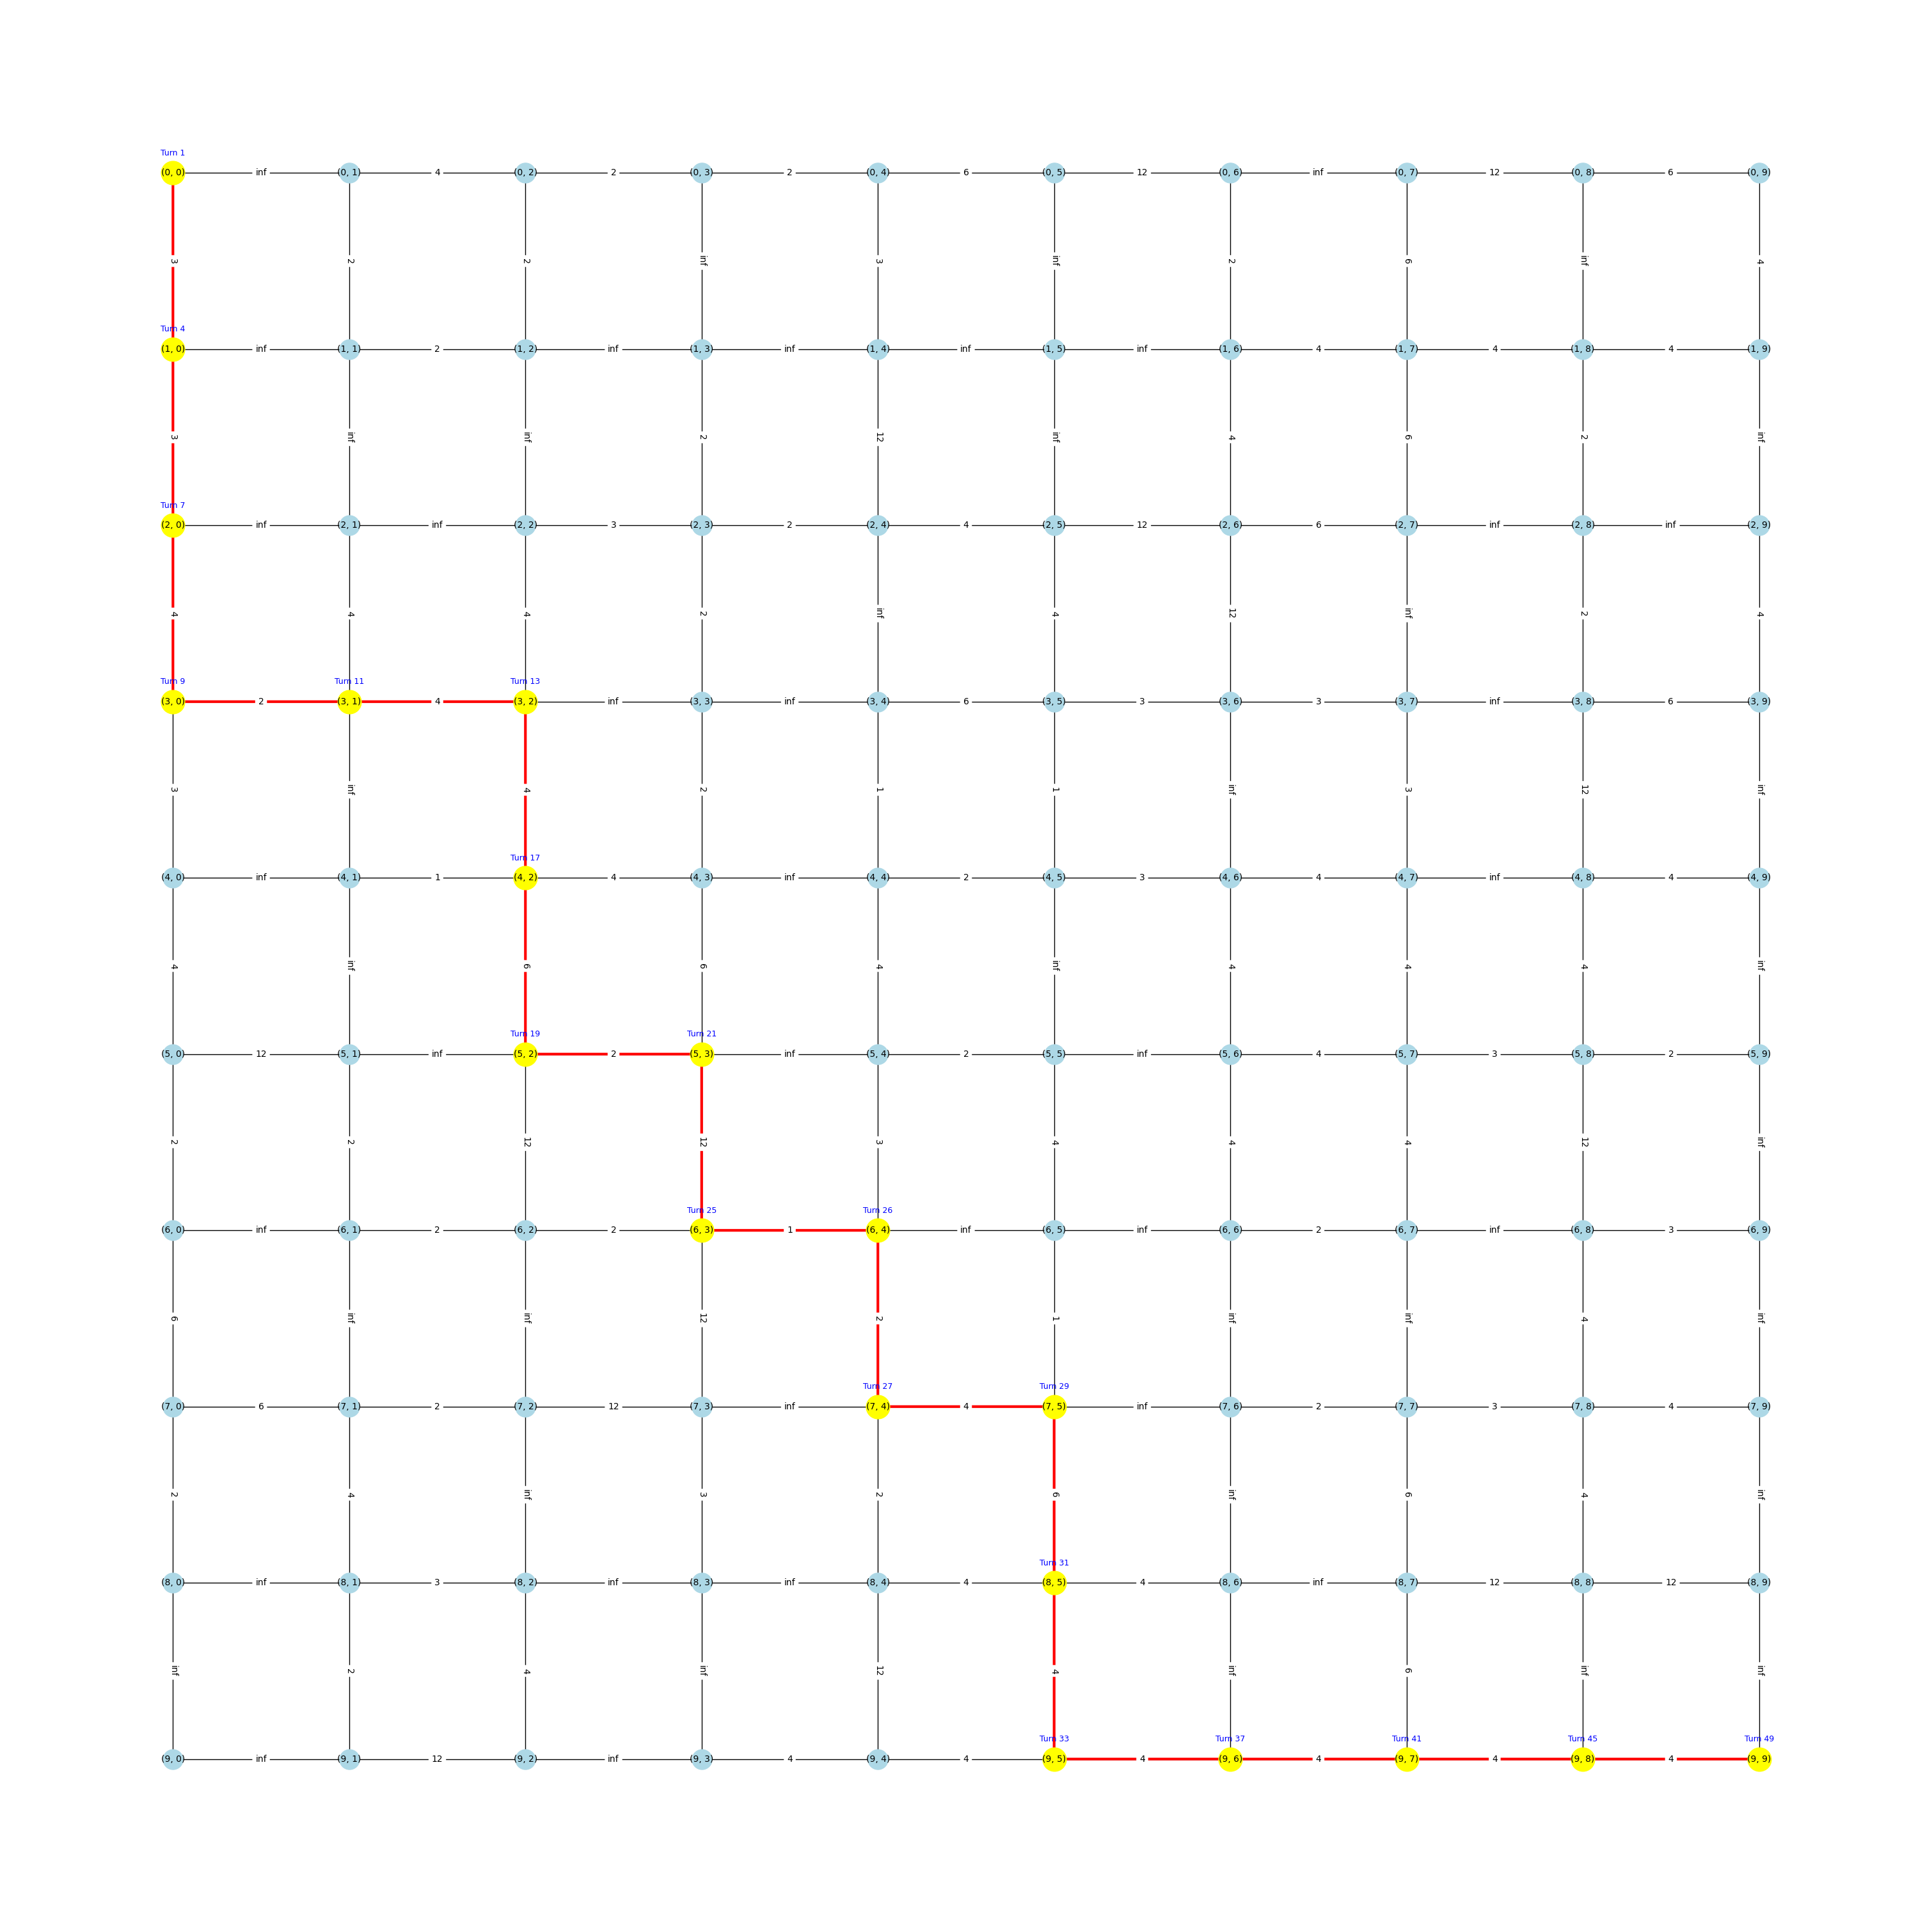

In [34]:
startNode = (0, 0)
targetNode = (9,9)
graph.visualize_graph_in_grid(minDistanceArray, parent, startNode=startNode, targetNode=targetNode)

In [25]:
minDistanceArray

[[0, 1, 4, 6, 9, 10, 12, 21, 22, 24],
 [4, 3, 6, 7, 12, 16, 16, 18, 21, 24],
 [16, 6, 8, 12, inf, 39, 36, 29, 28, 27],
 [12, 8, 10, 12, 15, 36, 30, 26, 32, 36],
 [24, 12, 12, 15, 16, 18, 20, 24, inf, 44],
 [27, 18, 24, 27, inf, 20, 24, 30, 36, 42],
 [inf, 20, 22, 36, 28, 24, 27, 28, 32, 44],
 [28, 24, 25, 26, 36, 30, 28, 30, 32, 48],
 [32, 28, 27, 27, 36, 32, 34, 32, 33, 40],
 [34, 36, inf, inf, 39, 36, 36, 36, 36, 38]]

(9, 6)


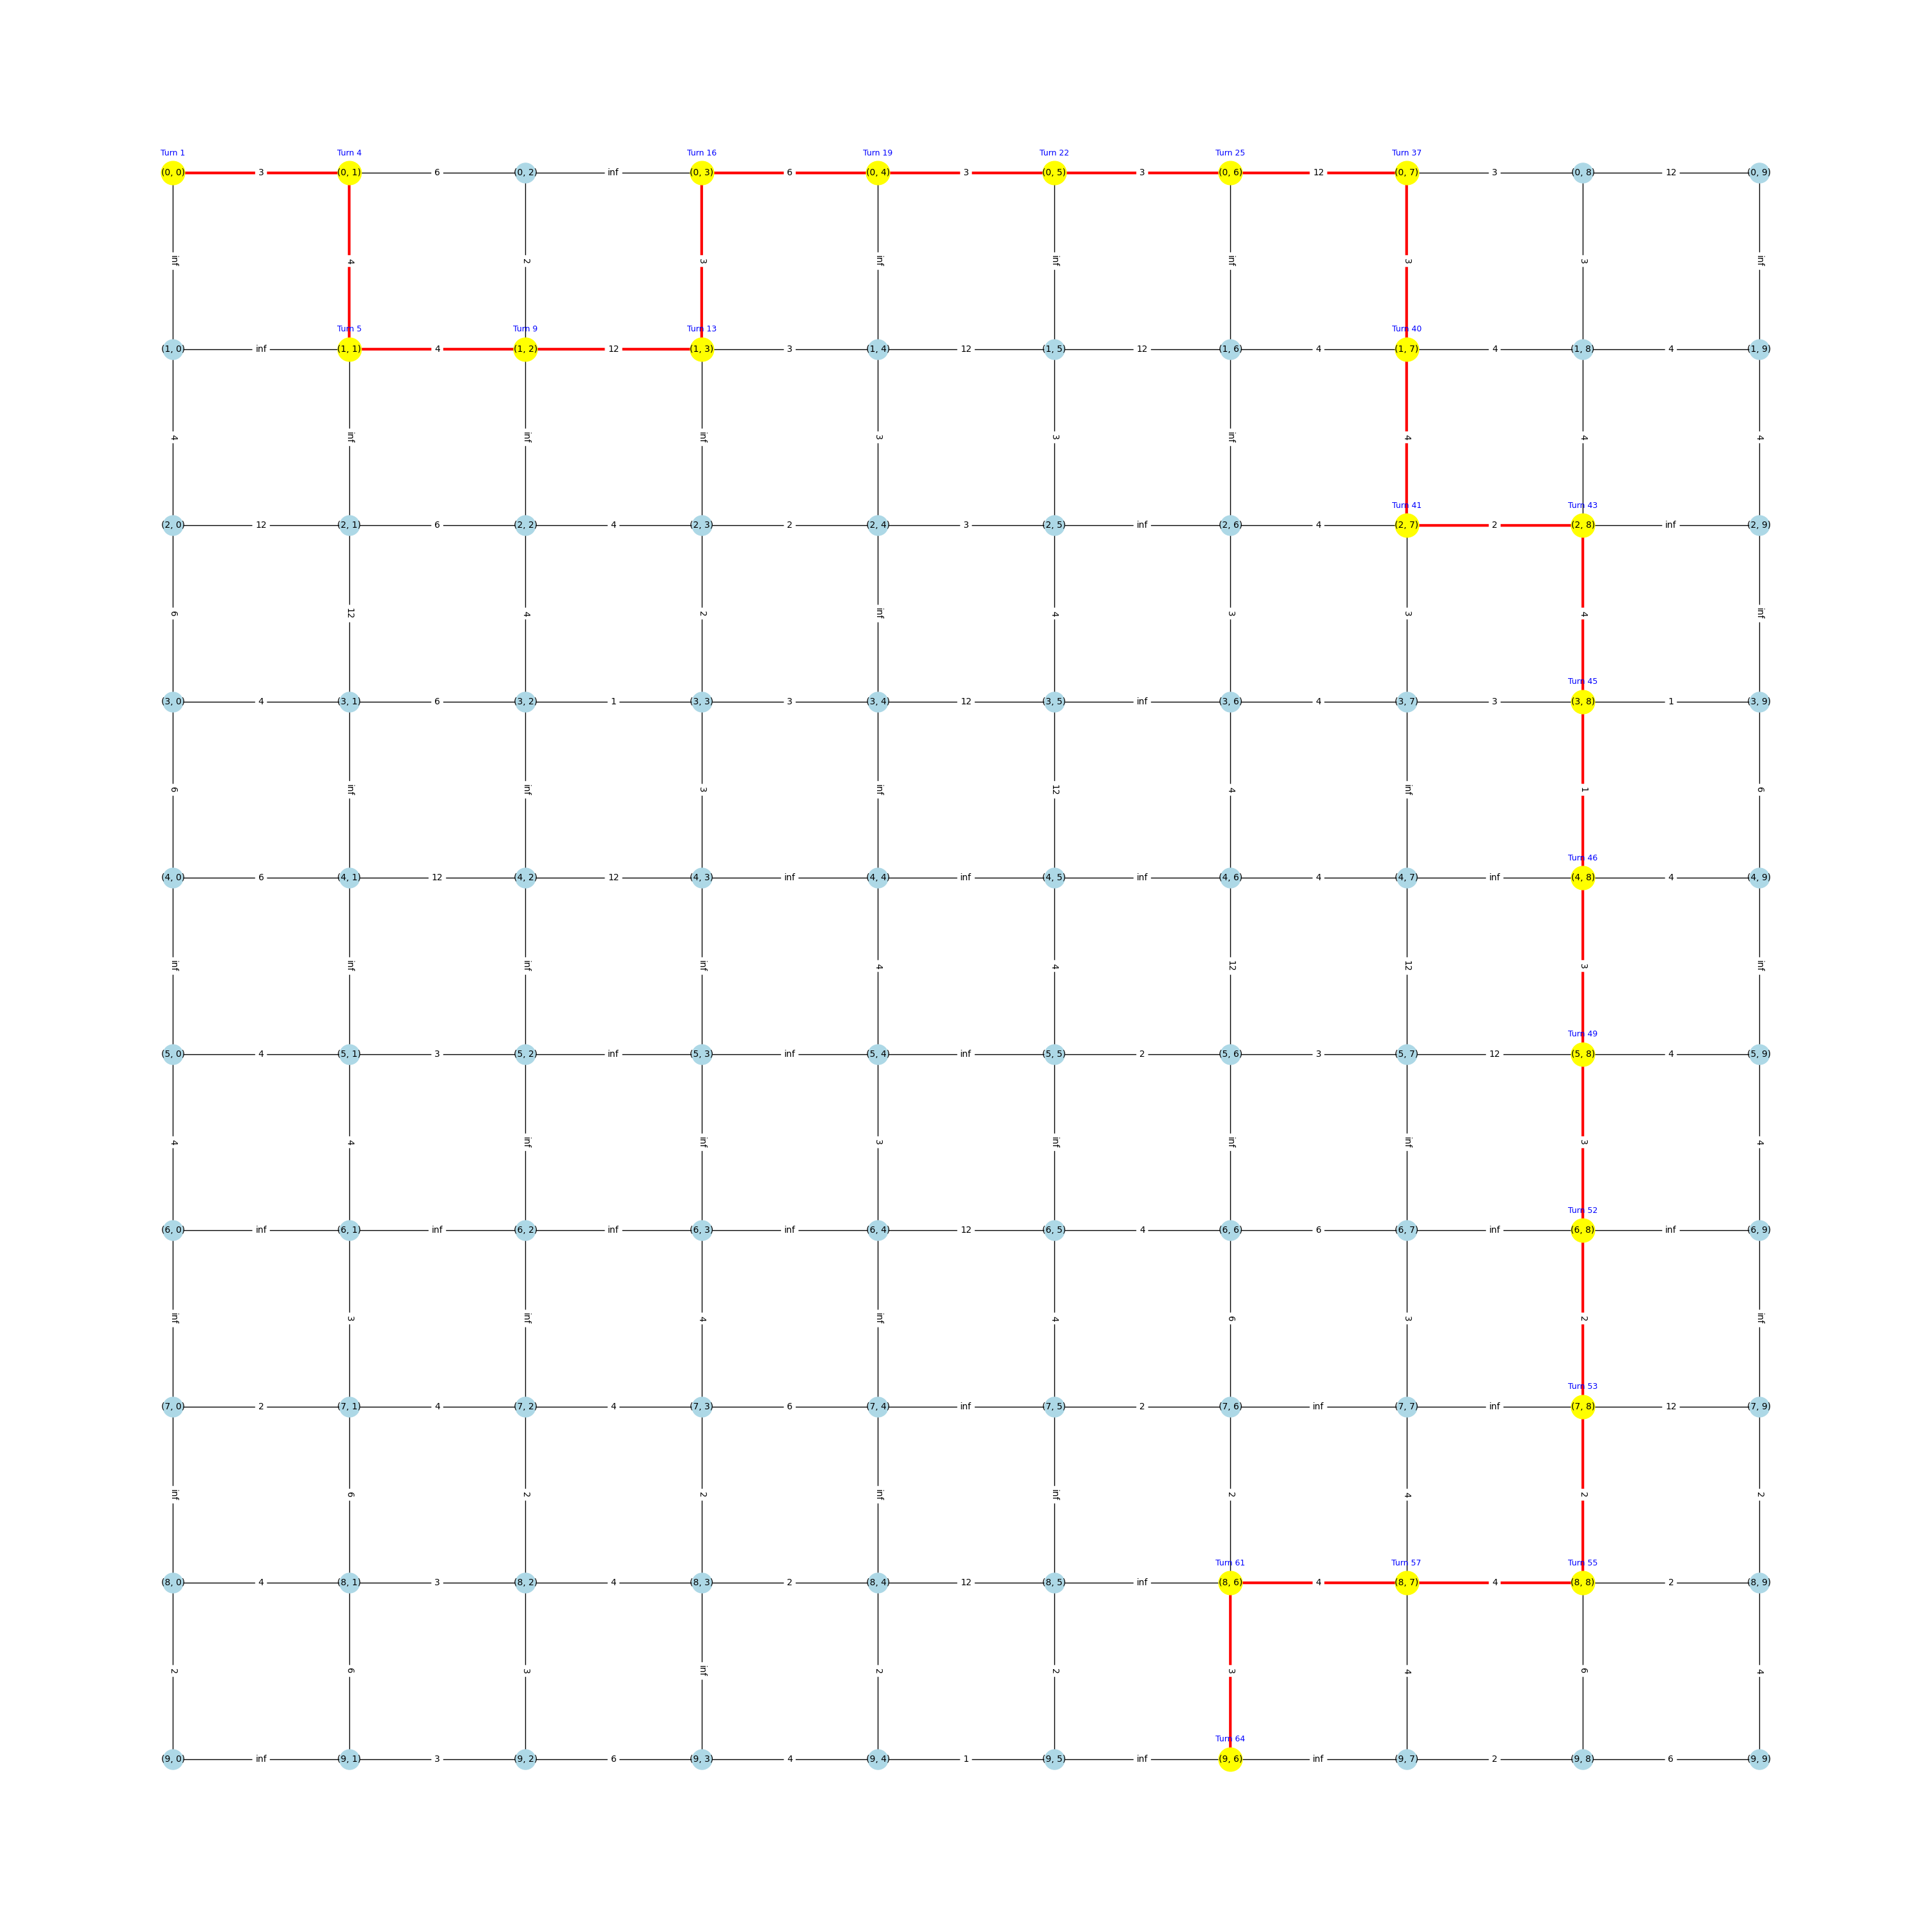

In [23]:
startNode = (0, 0)
targetNode = (9,6)
graph.visualize_graph_in_grid(minDistanceArray, parent, startNode=startNode, targetNode=targetNode)

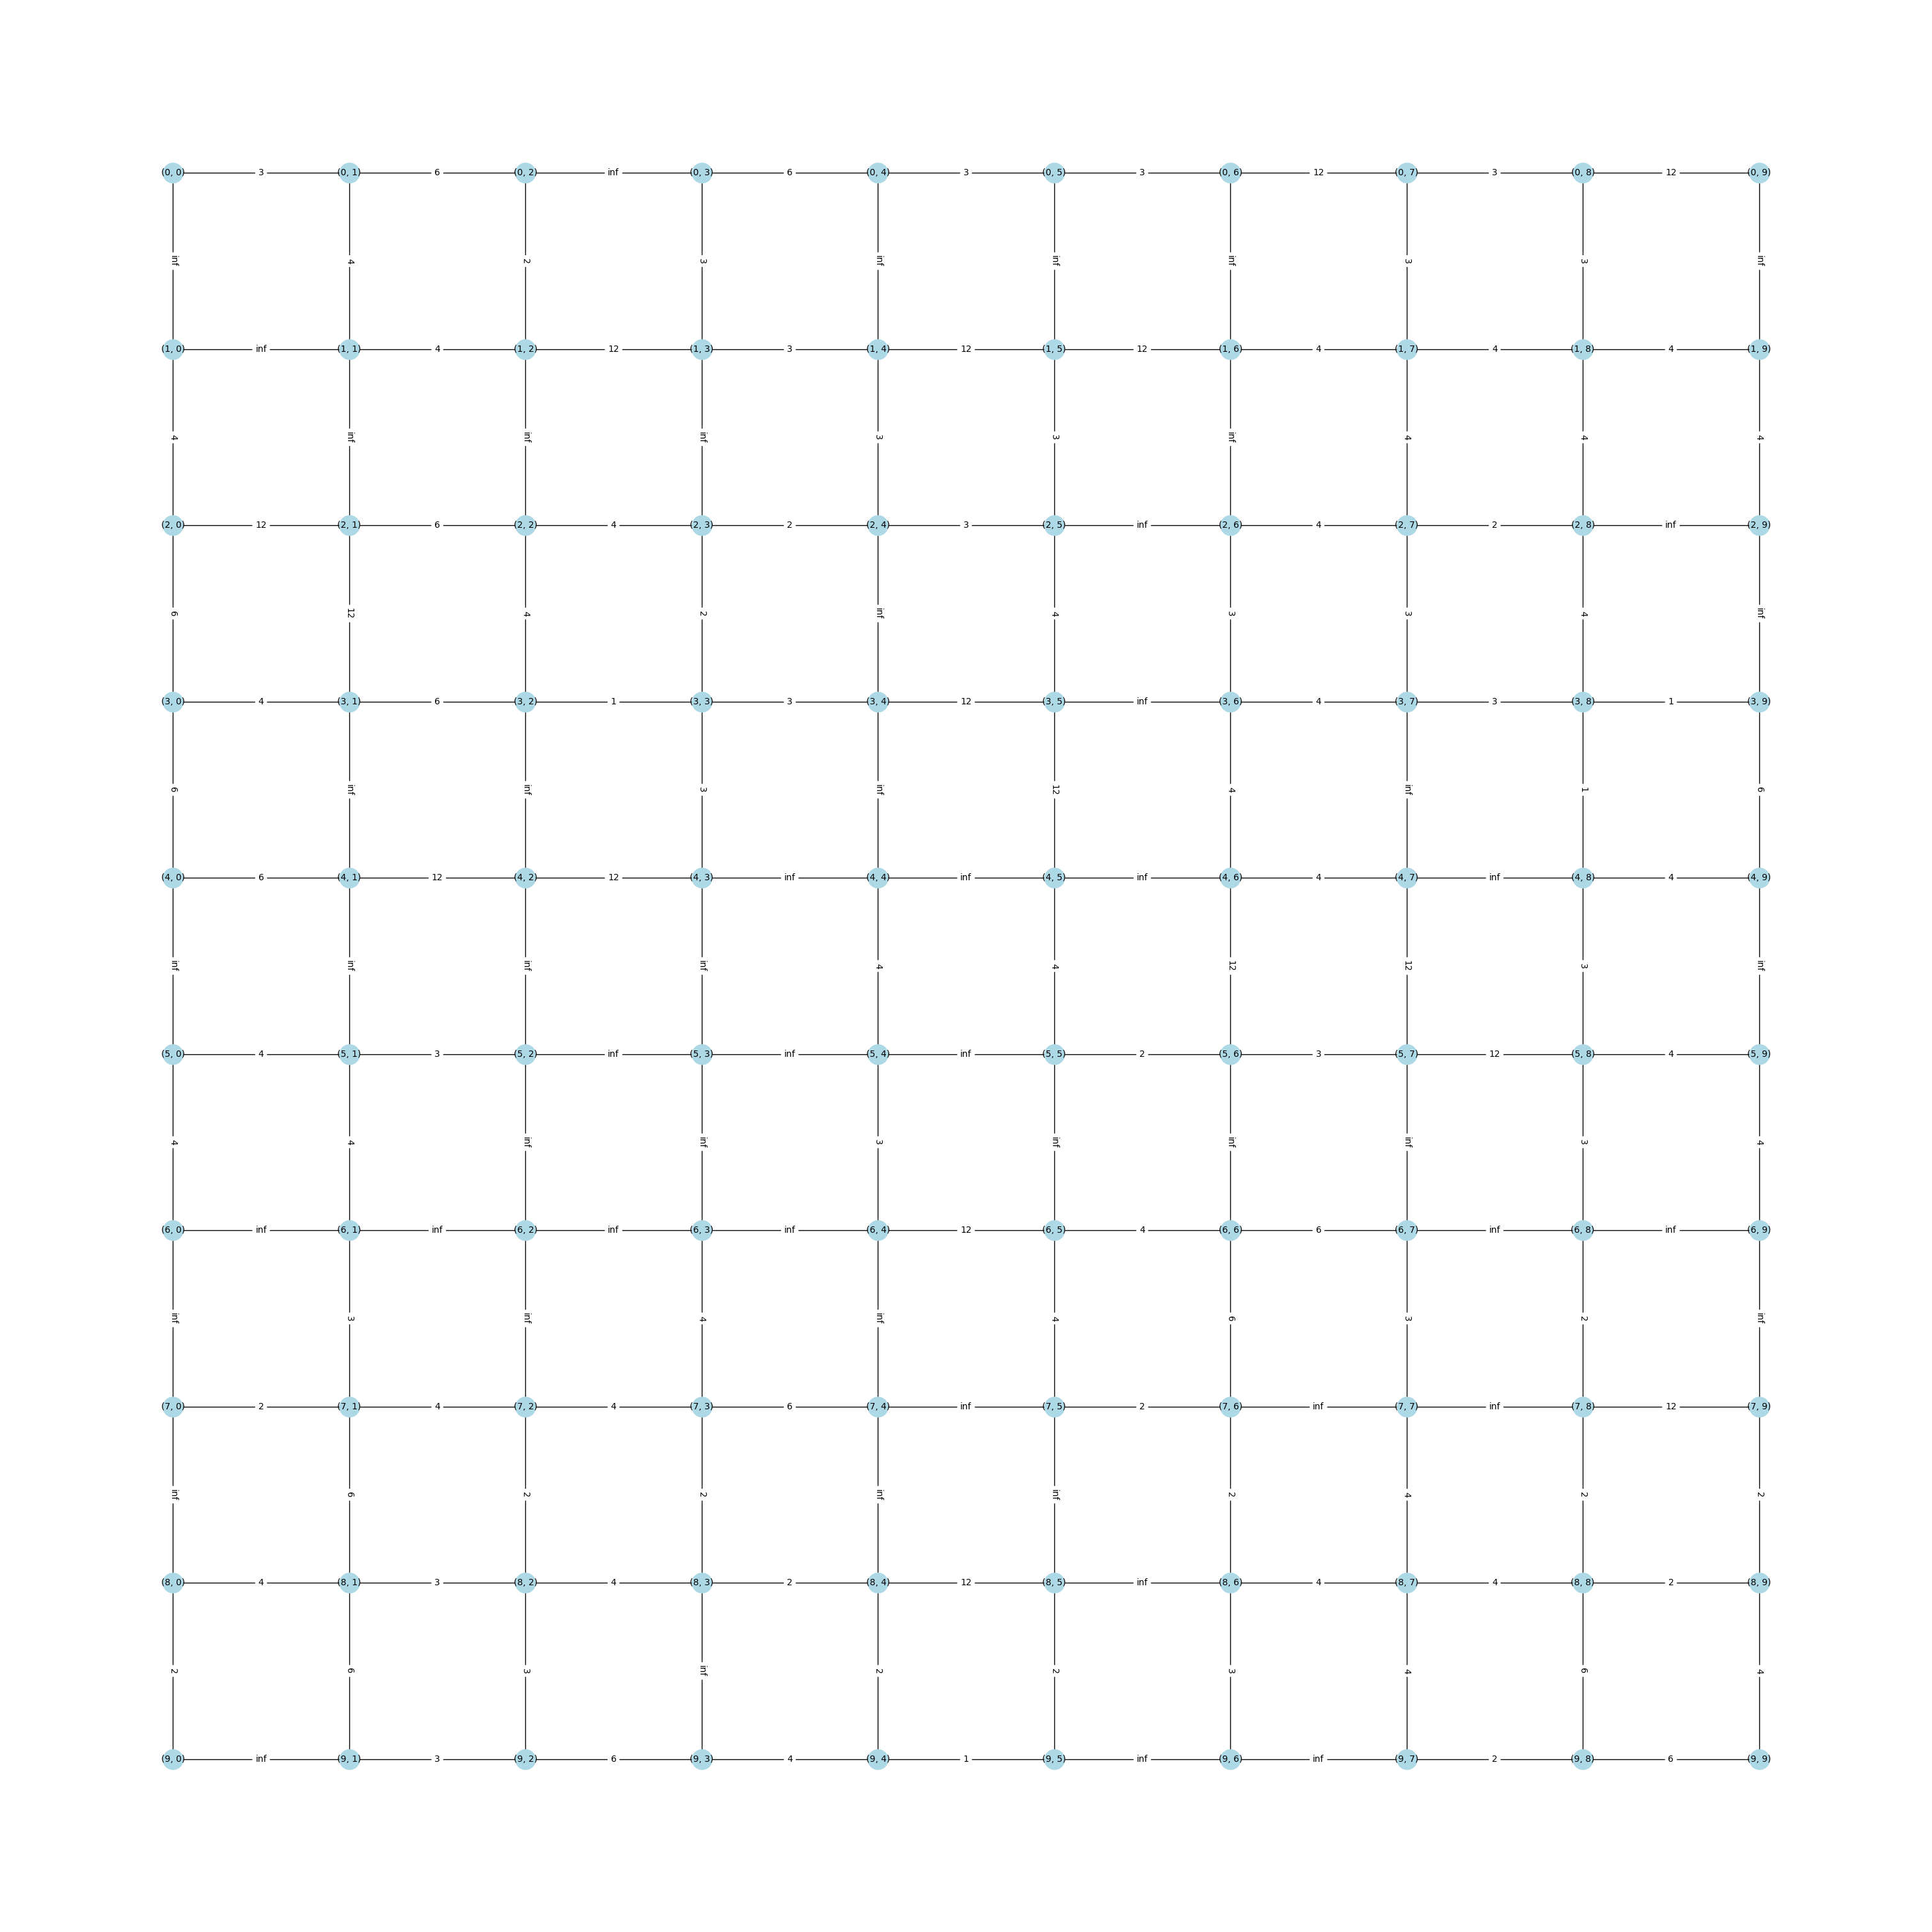

In [20]:
graph.visualize_graph_in_grid()